## Грибы
Изучить данные файла грибы.txt. Выполнить кластеризацию транзакций (выбрать оптимальный алгоритм и объяснить почему), построить необходимые визуализации для демонстрации работы алгоритма и итогов анализа.

In [42]:
# импортируем библиотеки 

import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline

In [43]:
# загружаем файл с данными
# выводим на просмотр первые строки 

mushrooms = pd.read_csv('mushrooms.csv', header=0, sep =';', decimal=',', encoding=('cp1251'))
mushrooms.head(5)

,Класс,Форма шапки,Поверхность шляпки,Цвет шляпки,Синие пятна,Запах,Форма крепления гименофора к ножке,Частота гименофора,Размер гименофора,Цвет гименофора,...,Поверхность ножки ниже кольца,Цвет ножки выше кольца,Цвет ножки ниже кольца,Тип покрывала,Цвет покрывала,Количество колец,Остатки частного покрывала,Цвет спор,Частота грибницы,Место обитания
0,ядовитый,выпуклая,гладкая,коричневый,есть,острый,свободный,закрытые,узкий,черный,...,гладкая,белый,белый,частное,белый,одно,подвесная,черный,разбросанные,город
1,съедобный,выпуклая,гладкая,желтый,есть,миндаля,свободный,закрытые,широкий,черный,...,гладкая,белый,белый,частное,белый,одно,подвесная,коричневый,многочисленные,трава
2,съедобный,колокол,гладкая,белый,есть,аниса,свободный,закрытые,широкий,коричневый,...,гладкая,белый,белый,частное,белый,одно,подвесная,коричневый,многочисленные,луга
3,ядовитый,выпуклая,чешуйчатая,белый,есть,острый,свободный,закрытые,узкий,коричневый,...,гладкая,белый,белый,частное,белый,одно,подвесная,черный,разбросанные,город
4,съедобный,выпуклая,гладкая,серый,нет,отсутствует,свободный,частые,широкий,черный,...,гладкая,белый,белый,частное,белый,одно,затухающая,коричневый,обильные,трава


In [44]:
# смотрим описание

mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
Класс                                 8124 non-null object
Форма шапки                           8124 non-null object
Поверхность шляпки                    8124 non-null object
Цвет шляпки                           8124 non-null object
Синие пятна                           8124 non-null object
Запах                                 8124 non-null object
Форма крепления гименофора к ножке    8124 non-null object
Частота гименофора                    8124 non-null object
Размер гименофора                     8124 non-null object
Цвет гименофора                       8124 non-null object
Форма ножки                           8124 non-null object
Корень ножки                          8124 non-null object
Поверхность ножки выше кольца         8124 non-null object
Поверхность ножки ниже кольца         8124 non-null object
Цвет ножки выше кольца                8124 non-null object
Цвет нож

In [45]:
# посмотрим на соотношение классов (количество примеров съедобных и ядовитых грибов примерно одинаковое)

mushrooms['Класс'].value_counts()

съедобный    4208
ядовитый     3916
Name: Класс, dtype: int64

In [46]:
# посмотрим на распределение остальных признаков

for col in mushrooms.columns:
    print(col)
    print(mushrooms[col].value_counts())

Класс
съедобный    4208
ядовитый     3916
Name: Класс, dtype: int64
Форма шапки
выпуклая      3656
плоская       3152
с бугорком     828
колокол        452
вогнутая        32
коническая       4
Name: Форма шапки, dtype: int64
Поверхность шляпки
чешуйчатая      3244
гладкая         2556
волокнистая     2320
трещиноватая       4
Name: Поверхность шляпки, dtype: int64
Цвет шляпки
коричневый    2284
серый         1840
красный       1500
желтый        1072
белый         1040
бежевый        168
розовый        144
корица          44
зеленый         16
фиолетовый      16
Name: Цвет шляпки, dtype: int64
Синие пятна
нет     4748
есть    3376
Name: Синие пятна, dtype: int64
Запах
отсутствует    3528
грязи          2160
пряный          768
рыбный          576
миндаля         400
аниса           400
острый          256
затхлый          36
Name: Запах, dtype: int64
Форма крепления гименофора к ножке
свободный    7914
приросший     210
Name: Форма крепления гименофора к ножке, dtype: int64
Частота ги

Признак 'Тип покрывала' имеет только одно значение. Значит оно может быть как у ядовитых, так и у сьедобных грибов.

In [47]:
# проверяем данные на наличие пропусков

for col in mushrooms.columns:
    print(col, mushrooms[mushrooms[col].isnull()].shape[0])

Класс 0
Форма шапки 0
Поверхность шляпки 0
Цвет шляпки 0
Синие пятна 0
Запах 0
Форма крепления гименофора к ножке 0
Частота гименофора 0
Размер гименофора 0
Цвет гименофора 0
Форма ножки 0
Корень ножки 0
Поверхность ножки выше кольца 0
Поверхность ножки ниже кольца 0
Цвет ножки выше кольца 0
Цвет ножки ниже кольца 0
Тип покрывала 0
Цвет покрывала 0
Количество колец 0
Остатки частного покрывала 0
Цвет спор 0
Частота грибницы 0
Место обитания 0


In [48]:
# посмотрим, есть ли взаимосвязь между признаками и целевой переменной 
# так как все признаки у нас категориальные, будем смотреть на коэффициент V Крамера

from scipy.stats import chi2_contingency

def cramers_corrected_stat(df: pd.DataFrame, label_name: str):
    
    y = df[label_name]
    df = df.drop(label_name, axis=1)
    corr = pd.DataFrame()
    summary = pd.DataFrame()
    
    for column in df.columns:
        x = df[column]
        V = -1
        if len(x.value_counts()) == 1 :
            print('{} Тип покрывала'.format(column))
        else:   
            conf_matrix = pd.crosstab(x, y)  # матрица сопряжённости
            
            if conf_matrix.shape[0] == 2:
                correct = False
            else:
                correct = True
            # считаем значение хи-квадрат
            chi2 = chi2_contingency(conf_matrix, correction=correct)[0]
            n = sum(conf_matrix.sum())
            phi2 = chi2/n
            r, k = conf_matrix.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            # коэффициента V Крамера
            V = round(np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1))), 3)
            corr['feature'] = pd.Series(column)
            corr['cramers_v'] = pd.Series(V)
            summary = summary.append(corr)
            
    summary = summary.set_index('feature')
    summary = summary.sort_values(by = ['cramers_v'], ascending = False)
    plt.figure(figsize = (4,15))
    fig = sns.heatmap(summary, annot = True, fmt = 'g', cmap = 'YlGnBu')
    plt.title('Correlation of Variables with {}'.format(label_name));

Тип покрывала Тип покрывала


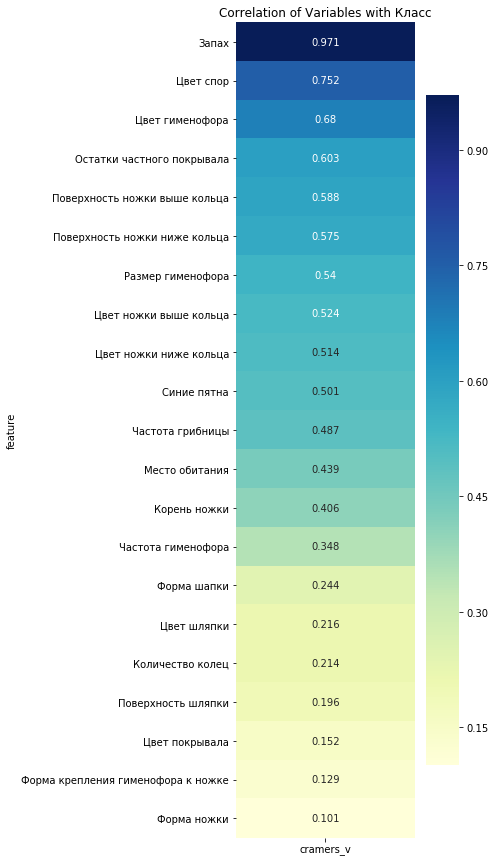

In [49]:
cramers_corrected_stat(mushrooms, label_name='Класс')

Видим сильную корреляцию между запахом и целевой переменной. 
На самом деле грибы часто проверяют на запах.
Так же сильной корреляцией обладает признак цвет спор и цвет гименофора.

По этим признакам мы сможем отличить ядовитый гриб от съедобного.